# First data examples

This notebook goes through some real data examples

In [6]:
import numpy as np
import pandas as pd

## Google Analytics data

This is a simple dataset about users at a website.

In [7]:
?pd.read_excel

Signature:
pd.read_excel(
    io,
    sheet_name: 'str | int | list[IntStrT] | None' = 0,
    *,
    header: 'int | Sequence[int] | None' = 0,
    names: 'SequenceNotStr[Hashable] | range | None' = None,
    index_col: 'int | str | Sequence[int] | None' = None,
    usecols: 'int | str | Sequence[int] | Sequence[str] | Callable[[str], bool] | None' = None,
    dtype: 'DtypeArg | None' = None,
    engine: "Literal['xlrd', 'openpyxl', 'odf', 'pyxlsb', 'calamine'] | None" = None,
    converters: 'dict[str, Callable] | dict[int, Callable] | None' = None,
    true_values: 'Iterable[Hashable] | None' = None,
    false_values: 'Iterable[Hashable] | None' = None,
    skiprows: 'Sequence[int] | int | Callable[[int], object] | None' = None,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    parse_dates: 'list | dict | bool' = False,
    date_parser: 'Callable | lib.NoDefault' = <no_default>,
    da

In [8]:
webdata = pd.read_excel("Webanalytics_data_example.xlsx", sheet_name = "Dataset1")

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [4]:
webdata

,MediaChannel,Sessions,PercentNewSessions,NewUsers,BounceRate,PagesPerSession,AvgSessionDuration,Transactions,Revenue
0,Organic_Search,76852,0.784092,60259,0.394837,7.225290,161.326342,989,94966.75
1,Social,59398,0.943315,56031,0.542375,3.232348,111.798832,38,1692.29
2,Paid_Search,31882,0.666395,21246,0.621918,4.461326,97.984129,425,21515.42
3,Direct,26348,0.758653,19989,0.459466,6.277820,162.812206,367,52054.79
4,Referral,18762,0.530540,9954,0.269961,12.226149,259.000320,1231,202558.88
5,Display,6411,0.850257,5451,0.834191,2.359850,34.354703,34,7956.42
6,Other,29,0.310345,9,0.586207,2.448276,57.344828,0,0.00
7,Email,19,0.210526,4,0.315789,3.368421,132.894737,0,0.00


In [ ]:
webdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MediaChannel        8 non-null      object 
 1   Sessions            8 non-null      int64  
 2   PercentNewSessions  8 non-null      float64
 3   NewUsers            8 non-null      int64  
 4   BounceRate          8 non-null      float64
 5   PagesPerSession     8 non-null      float64
 6   AvgSessionDuration  8 non-null      float64
 7   Transactions        8 non-null      int64  
 8   Revenue             8 non-null      float64
dtypes: float64(5), int64(3), object(1)
memory usage: 704.0+ bytes


Selecting only those media channels for which bounce rate i larger than 0.6:

In [ ]:
webdata[webdata["BounceRate"] > 0.6]

,MediaChannel,Sessions,PercentNewSessions,NewUsers,BounceRate,PagesPerSession,AvgSessionDuration,Transactions,Revenue
2,Paid_Search,31882,0.666395,21246,0.621918,4.461326,97.984129,425,21515.42
5,Display,6411,0.850257,5451,0.834191,2.359850,34.354703,34,7956.42


In [7]:
webdata[webdata["BounceRate"] > 0.6][["MediaChannel", "BounceRate"]]

,MediaChannel,BounceRate
2,Paid_Search,0.621918
5,Display,0.834191


Selecting the rows for which Transactions i bigger than 100 and Sessions is less than 30000

In [8]:
webdata[(webdata["Transactions"] > 100) & (webdata["Sessions"] < 30000 )]

,MediaChannel,Sessions,PercentNewSessions,NewUsers,BounceRate,PagesPerSession,AvgSessionDuration,Transactions,Revenue
3,Direct,26348,0.758653,19989,0.459466,6.277820,162.812206,367,52054.79
4,Referral,18762,0.530540,9954,0.269961,12.226149,259.000320,1231,202558.88


Finding the media channel with the highest revenue and putting the row on top (sorting the rows by revenue)

In [9]:
webdata.sort_values("Revenue",  ascending=False)[["MediaChannel", "Revenue"]]

,MediaChannel,Revenue
4,Referral,202558.88
0,Organic_Search,94966.75
3,Direct,52054.79
2,Paid_Search,21515.42
5,Display,7956.42
1,Social,1692.29
6,Other,0.00
7,Email,0.00


We can create a more precise measure for the effectiveness of a media channel by calculating the percentage of sessions that ended in a transaction. That is, for how many of the user sessions that the website had, did the user end up actually buying something. This is often referred to as the *conversion rate*. We create a new column called `ConversionRate` that is equal to `Transactions/Sessions`.

In [10]:
webdata["ConversionRate"] = webdata["Transactions"] / webdata["Sessions"]
webdata

,MediaChannel,Sessions,PercentNewSessions,NewUsers,BounceRate,PagesPerSession,AvgSessionDuration,Transactions,Revenue,ConversionRate
0,Organic_Search,76852,0.784092,60259,0.394837,7.225290,161.326342,989,94966.75,0.012869
1,Social,59398,0.943315,56031,0.542375,3.232348,111.798832,38,1692.29,0.000640
2,Paid_Search,31882,0.666395,21246,0.621918,4.461326,97.984129,425,21515.42,0.013330
3,Direct,26348,0.758653,19989,0.459466,6.277820,162.812206,367,52054.79,0.013929
4,Referral,18762,0.530540,9954,0.269961,12.226149,259.000320,1231,202558.88,0.065611
5,Display,6411,0.850257,5451,0.834191,2.359850,34.354703,34,7956.42,0.005303
6,Other,29,0.310345,9,0.586207,2.448276,57.344828,0,0.00,0.000000
7,Email,19,0.210526,4,0.315789,3.368421,132.894737,0,0.00,0.000000


In [11]:
webdata.sort_values("ConversionRate",  ascending=False)[["MediaChannel", "ConversionRate"]]

,MediaChannel,ConversionRate
4,Referral,0.065611
3,Direct,0.013929
2,Paid_Search,0.013330
0,Organic_Search,0.012869
5,Display,0.005303
1,Social,0.000640
6,Other,0.000000
7,Email,0.000000


## Diabetes dataset

This is classic dataset in machine learning and one of the example dataset that comes with scikit-learn. Thus we can load it directly from the scikit-learn package.

In [12]:
from sklearn.datasets import load_diabetes

In [ ]:
d_data = load_diabetes(as_frame=True)
d_data

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

In [14]:
diabetes_data = d_data.data

In [15]:
diabetes_data["Target"] = d_data.target

In [16]:
diabetes_data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [17]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
diabetes_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


We see that the means are almost close to zero, which means the data is probably normalized (more on this later in the course)

We want to know what correlates with the target...

In [ ]:
diabetes_data["Target"].corr(diabetes_data["age"])

0.18788875071891983

In [20]:
diabetes_data["Target"].corr(diabetes_data["sex"])

0.04306199845160532

In [21]:
diabetes_data["Target"].corr(diabetes_data["bmi"])

0.5864501344746884

In [22]:
diabetes_data["Target"].corr(diabetes_data["bp"])

0.44148175856257094

In [23]:
diabetes_data["Target"].corr(diabetes_data["s1"])

0.2120224810145506

In [24]:
diabetes_data["Target"].corr(diabetes_data["s2"])

0.17405358696874254

In [25]:
diabetes_data["Target"].corr(diabetes_data["s3"])

-0.3947892506709185

In [26]:
diabetes_data["Target"].corr(diabetes_data["s4"])

0.4304528847447727

In [27]:
diabetes_data["Target"].corr(diabetes_data["s5"])

0.5658825924427437

In [28]:
diabetes_data["Target"].corr(diabetes_data["s6"])

0.38248348424858114

Or we can actually get all the correlations in a matrix with one line of code

In [ ]:
diabetes_data.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


Later, when we talk about regression we will try to predict the target from all the columns.

## Adult dataset from UCI Machine Learning Repository

Contains information about income from adults in the US. We will load data from UCI Machine Learning Repository. See: https://archive.ics.uci.edu/dataset/2/adult

In [13]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [14]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [16]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


**EXERCISE:** Answer the following questions based on the Adult dataset
1. What is the mean age of all persons in the data?
1. What is the mean age of female persons? What about male persons?
1. How many different types of educations are there?
2. What are the different types of education and how many persons are the for each type?
3. Is there a difference in educational level across sex?
4. What is the most common relationship status?
5. Is there a correlation between hours per week (worked) and age?
6. Is the average hours per week (worked) different across different marital-status groups?
7. Is there an income difference across sexes?


1. What is the mean age of all persons in the data? 
<br>From the x.descibe() we can see that the meanage for all persons are 38.643585

1. What is the mean age of female persons? What about male persons?
<br>To find this we have to filter the data frame X for entries where sex is female and after one for where sex is Male.
<br>the we can just use the descibe() to get the mean age for the new filtered dataframes.
<br> mean age for:
<br>Female = 36.927989
<br>Male = 39.494395

In [21]:
dfFemale = X[X['sex'] == 'Female']
dfFemale.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16192.000000,1.619200e+04,16192.000000,16192.000000,16192.000000,16192.000000
mean,36.927989,1.855045e+05,10.044034,580.726285,61.475482,36.400692
std,14.137423,1.032172e+05,2.379446,5094.230188,340.112027,11.948866
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,25.000000,1.165600e+05,9.000000,0.000000,0.000000,30.000000
50%,35.000000,1.755720e+05,10.000000,0.000000,0.000000,40.000000
75%,46.000000,2.286092e+05,12.000000,0.000000,0.000000,40.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [22]:
dfMale = X[X['sex'] == 'Male']
dfMale.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32650.000000,3.265000e+04,32650.000000,32650.00000,32650.000000,32650.000000
mean,39.494395,1.917270e+05,10.094977,1326.20830,100.409709,42.416845
std,13.412850,1.067094e+05,2.660721,8367.78292,430.223459,12.120042
min,17.000000,1.349200e+04,1.000000,0.00000,0.000000,1.000000
25%,29.000000,1.179630e+05,9.000000,0.00000,0.000000,40.000000
50%,38.000000,1.801380e+05,10.000000,0.00000,0.000000,40.000000
75%,48.000000,2.417225e+05,13.000000,0.00000,0.000000,48.000000
max,90.000000,1.490400e+06,16.000000,99999.00000,3770.000000,99.000000


2. What are the different types of education and how many persons are the for each type?
<br>We can use the index'education' and use the method value_counts() to answear this.

In [24]:
X['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

 3. Is there a difference in educational level across sex?

In [29]:
dfMale['education'].value_counts(normalize=True) * 100

education
HS-grad         32.732006
Some-college    20.520674
Bachelors       16.992343
Masters          5.549770
Assoc-voc        4.064319
11th             3.558959
Assoc-acdm       2.983155
10th             2.854518
7th-8th          2.192956
Prof-school      2.150077
9th              1.641654
Doctorate        1.473201
12th             1.366003
5th-6th          1.169985
1st-4th          0.569678
Preschool        0.180704
Name: proportion, dtype: float64

In [28]:
dfFemale['education'].value_counts(normalize=True) * 100

education
HS-grad         31.478508
Some-college    25.802866
Bachelors       15.297678
Masters          5.218626
Assoc-voc        4.533103
11th             4.014328
Assoc-acdm       3.872283
10th             2.822381
7th-8th          1.476038
9th              1.358696
12th             1.303113
Prof-school      0.815217
5th-6th          0.784338
Doctorate        0.697875
1st-4th          0.376729
Preschool        0.148221
Name: proportion, dtype: float64

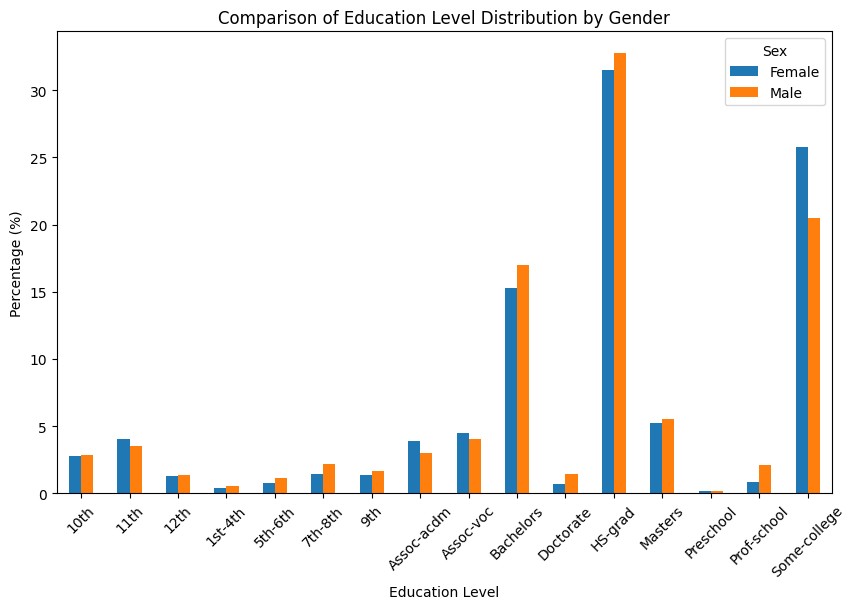

In [34]:
import matplotlib.pyplot as plt

education_sex_dist = X.groupby(['education', 'sex']).size().unstack()
education_sex_dist = education_sex_dist.div(education_sex_dist.sum(axis=0), axis=1) * 100  # Convert to %

education_sex_dist.plot(kind='bar', figsize=(10,6))
plt.title("Comparison of Education Level Distribution by Gender")
plt.ylabel("Percentage (%)")
plt.xlabel("Education Level")
plt.legend(title="Sex")
plt.xticks(rotation=45)
plt.show()

4. What is the most common relationship status?


In [35]:
X['relationship'].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [36]:
X['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

5. Is there a correlation between hours per week (worked) and age?


Maybe a short descibtion of the corr() !!!!!!!

In [42]:
cor = X[['hours-per-week', 'age']].corr()
print(cor)

                hours-per-week       age
hours-per-week        1.000000  0.071558
age                   0.071558  1.000000


because the correlation is close to 0. their is no real realtion.

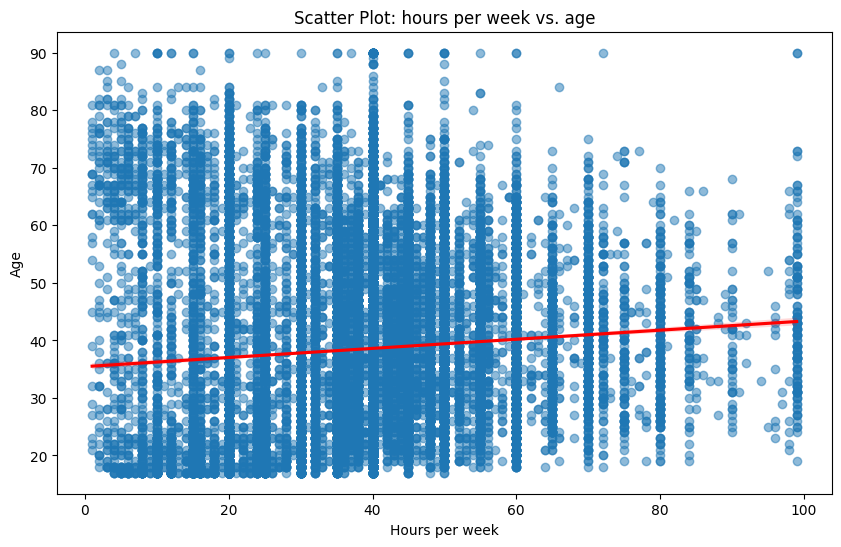

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Scatter plot
sns.regplot(x=X['hours-per-week'], y=X['age'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Titles and labels
plt.title("Scatter Plot: hours per week vs. age")
plt.xlabel("Hours per week")
plt.ylabel("Age")

plt.show()


6. Is the average hours per week (worked) different across different marital-status groups?


In [46]:
avg_hours_for_maritalS = X.groupby('marital-status')['hours-per-week'].mean()
print(avg_hours_for_maritalS)

marital-status
Divorced                 41.115483
Married-AF-spouse        39.810811
Married-civ-spouse       43.306984
Married-spouse-absent    39.684713
Never-married            36.891357
Separated                39.667974
Widowed                  33.438076
Name: hours-per-week, dtype: float64


In [47]:
from scipy.stats import f_oneway

# Create groups for each marital status
groups = [X[X['marital-status'] == status]['hours-per-week'] for status in X['marital-status'].unique()]

# Perform ANOVA test
anova_result = f_oneway(*groups)
print(f"ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")


ANOVA F-statistic: 538.7973350458253, p-value: 0.0


7. Is there an income difference across sexes?

In [54]:
print(y)

       income
0       <=50K
1       <=50K
2       <=50K
3       <=50K
4       <=50K
...       ...
48837  <=50K.
48838  <=50K.
48839  <=50K.
48840  <=50K.
48841   >50K.

[48842 rows x 1 columns]


In [53]:
y.describe()

,income
count,48842
unique,4
top,<=50K
freq,24720


In [52]:
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [67]:
df = X.merge(y, left_index=True, right_index=True)

In [69]:
# Standardize income labels by removing the period (if present)
df['income_cleaned'] = df['income'].str.replace(r'\.$', '', regex=True)

# Recalculate the normalized value counts
merged_counts = df.groupby('sex')['income_cleaned'].value_counts(normalize=True) * 100

# Display the cleaned and merged result
print(merged_counts)


sex     income_cleaned
Female  <=50K             89.074852
        >50K              10.925148
Male    <=50K             69.623277
        >50K              30.376723
Name: proportion, dtype: float64


In [70]:
df['sex_numeric'] = df['sex'].map({'Male': 0, 'Female': 1})
df['income_numeric'] = df['income_cleaned'].map({'<=50K': 0, '>50K': 1})
correlation = df[['sex_numeric', 'income_numeric']].corr()
print(correlation)


                sex_numeric  income_numeric
sex_numeric        1.000000       -0.214628
income_numeric    -0.214628        1.000000


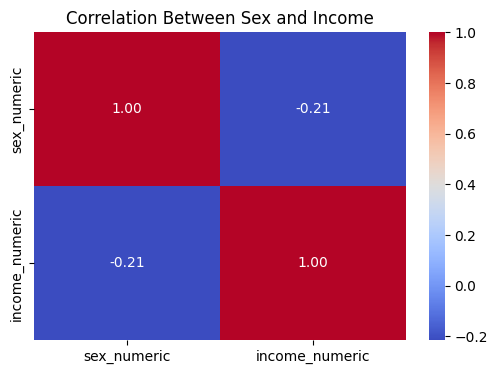

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Sex and Income")
plt.show()
